<a href="https://colab.research.google.com/github/gui98araujo/Machine_Learning_Projects/blob/main/classificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import pandas as pd
import seaborn as sns

In [61]:
df = pd.read_csv('/content/occupancy.csv')

In [62]:
df.head()

,datetime,temperature,relative humidity,light,CO2,humidity,occupancy
0,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
1,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
2,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
3,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
4,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [63]:
df.occupancy.value_counts()

0    15810
1     4750
Name: occupancy, dtype: int64

In [64]:
df = df.drop(columns = {'datetime'})

In [65]:
from scipy.stats import zscore


In [66]:
df[['temperature','relative humidity','light', 'CO2', 'humidity']] = zscore(df[['temperature','relative humidity','light', 'CO2', 'humidity']])

In [67]:
df

,temperature,relative humidity,light,CO2,humidity,occupancy
0,2.154659,-0.077062,1.403076,0.098642,0.735396,1
1,2.126231,-0.077965,1.419709,0.075344,0.722962,1
2,2.126231,-0.082481,1.403076,0.073738,0.717782,1
3,2.126231,-0.091514,1.403076,0.056867,0.707423,1
4,2.078850,-0.091514,1.403076,0.044817,0.688518,1
...,...,...,...,...,...,...
20555,-0.086433,0.012359,1.420897,2.617973,-0.019986,1
20556,-0.039053,0.017879,1.391196,2.647697,0.002537,1
20557,-0.015363,0.017879,1.391196,2.670191,0.011075,1
20558,-0.015363,0.073579,1.368622,3.025276,0.066642,1


In [68]:
X = df[['temperature', 'relative humidity', 'light', 'CO2', 'humidity']]
y = df['occupancy']

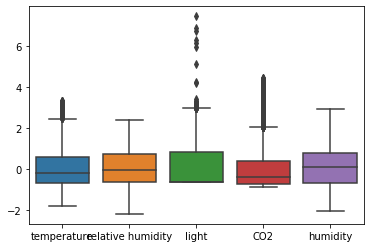

In [69]:
sns.boxplot( data =  X)

#Random Forest Classifier #

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,random_state = 0)

In [71]:
from sklearn.ensemble import RandomForestClassifier

rf =  RandomForestClassifier(random_state = 0 )

In [72]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [73]:
rf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [74]:
# Importamos GridSearchCV
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators': [ 100, 200],
              'max_depth': [3, 11]}

grid_search = GridSearchCV(rf, parameters, scoring='f1', n_jobs=-1)

In [75]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [3, 11], 'n_estimators': [100, 200]},
             scoring='f1')

In [76]:
grid_search.best_params_

{'max_depth': 11, 'n_estimators': 200}

In [79]:

rf_tunned =  RandomForestClassifier(n_estimators = 200,
                                     max_depth = 10,
                                    random_state = 0)
rf_tunned

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=0)

In [80]:
rf_tunned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=0)

In [81]:
rf_tunned.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [82]:
rf_tunned.feature_importances_
feature_importances = pd.DataFrame(rf_tunned.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending = False)
feature_importances

,importance
light,0.697810
temperature,0.165011
CO2,0.097483
humidity,0.024532
relative humidity,0.015164
